In [9]:
%matplotlib inline

from matplotlib import style
style.use('fivethirtyeight')

import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

inspector = inspect(engine)

In [13]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [14]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent
most_recent_dt = dt.datetime.strptime(most_recent[0], '%Y-%m-%d')
test_date = dt.datetime(most_recent_dt.year - 1, most_recent_dt.month, most_recent_dt.day) 
test_date


datetime.datetime(2016, 8, 23, 0, 0)

<function matplotlib.pyplot.show(close=None, block=None)>

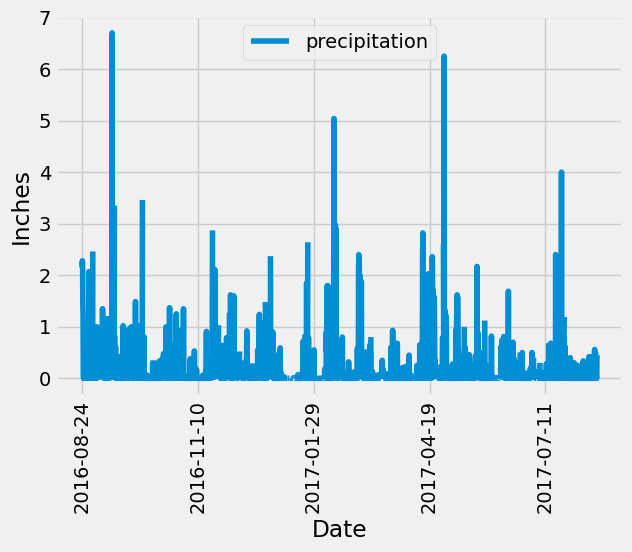

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
most_recent_dt = dt.datetime.strptime(most_recent[0], '%Y-%m-%d')
test_date = dt.datetime(most_recent_dt.year - 1, most_recent_dt.month, most_recent_dt.day) 
test_date

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= test_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_data_df = pd.DataFrame(precip_data, columns = ["date", "precipitation"]).sort_values(by = ["date"])
precip_data_df.set_index("date", inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
precip_data_df.plot()
plt.tight_layout()
plt.xticks(rotation = 90)

plt.ylabel("Inches")
plt.xlabel("Date")
plt.show

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_data_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).group_by(measurement.station).count()

9

In [269]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
for x in session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()):
    print(x)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats = [
    func.min(measurement.tobs),
    func.max(measurement.tobs),
    func.avg(measurement.tobs)
]

session.query(*stats).filter(measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [50]:
start_date = dt.datetime.strptime("2016-08-08", "%Y-%m-%d").date()
session = Session(engine)
results = session.query(*stats).filter(measurement.date >= start_date).all()
results[0][0]

58.0

<function matplotlib.pyplot.show(close=None, block=None)>

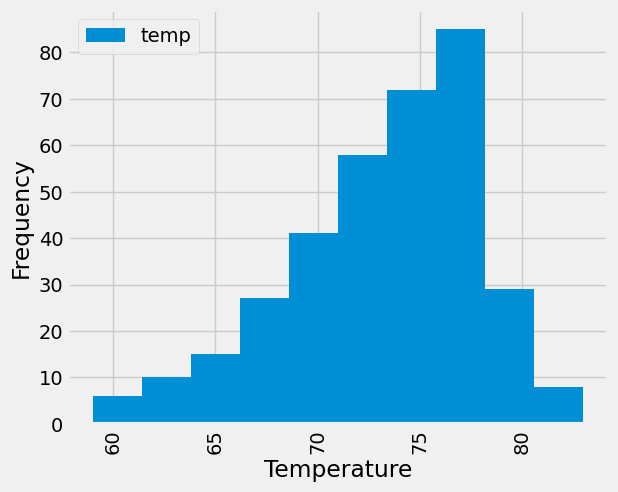

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement.date, measurement.tobs).filter(measurement.date >= test_date).filter(measurement.station == "USC00519281").all()
temp_data_df = pd.DataFrame(temp_data, columns = ["date", "temp"]).sort_values(by = ["date"])

temp_data_df.plot(kind = "hist")
plt.tight_layout()
plt.xticks(rotation = 90)

plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show


# Close Session

In [24]:
# Close Session
session.close()